## I plan to do an exploratory analysis of the Instacart data

In [27]:
import pandas as pd
import numpy as np
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot') # for ggplot-like style

## Import Data

In [28]:
aisles=pd.read_csv('aisles.csv')

departments=pd.read_csv('departments.csv')

orders=pd.read_csv('orders.csv')

products=pd.read_csv('products.csv')

order_products_prior=pd.read_csv('order_products__prior.csv')

order_products_train=pd.read_csv('order_products__train.csv')


## Look at the orders dataset

In [29]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [30]:
#import custoemr data
xls=pd.ExcelFile('relay-foods.xlsx')

#read the second sheet of the excel
udata=xls.parse(1)

# Extract year and month from the OrderDate column. strftim convert datetime to string 
udata['OrderPeriod'] = udata.OrderDate.apply(lambda g: g.strftime('%Y-%m')) #'%y-%m' will return 09 instead of 2009 as the year

# generate cohort group based the the earliest order date for each user id
udata['CohortGroup']=udata.groupby(level=0)['OrderDate'].min().apply(lambda g: g.strftime('%Y-%m'))

udata


,OrderId,OrderDate,UserId,TotalCharges,CommonId,PupId,PickupDate,OrderPeriod,CohortGroup
0,262,2009-01-11,47,50.6700,TRQKD,2,2009-01-12,2009-01,2009-01
1,278,2009-01-20,47,26.6000,4HH2S,3,2009-01-20,2009-01,2009-01
2,294,2009-02-03,47,38.7100,3TRDC,2,2009-02-04,2009-02,2009-02
3,301,2009-02-06,47,53.3800,NGAZJ,2,2009-02-09,2009-02,2009-02
4,302,2009-02-06,47,14.2800,FFYHD,2,2009-02-09,2009-02,2009-02
...,...,...,...,...,...,...,...,...,...
2886,3220,2010-03-08,393616,60.0155,AWNXG,15,2010-03-08,2010-03,2010-03
2887,3192,2010-03-07,394290,45.4300,AKGQT,12,2010-03-10,2010-03,2010-03
2888,3193,2010-03-07,394346,14.2100,2B47R,15,2010-03-08,2010-03,2010-03
2889,3207,2010-03-08,395039,34.6200,H6E23,4,2010-03-08,2010-03,2010-03


In [31]:
udata.groupby(['CohortGroup','OrderPeriod'],sort=0).apply( lambda g: pd.Series({\
    'TotalOrders': g.OrderId.nunique(),\
    'TotalUsers': g.UserId.nunique(),\
    'TotalCharges': g.TotalCharges.sum(),\
    }))

,,TotalOrders,TotalUsers,TotalCharges
CohortGroup,OrderPeriod,,,
2009-01,2009-01,30.0,22.0,1850.2550
2009-02,2009-02,40.0,23.0,2017.3750
2009-03,2009-03,52.0,26.0,2665.2800
2009-04,2009-04,103.0,57.0,5598.3300
2009-05,2009-05,147.0,79.0,6554.3350
2009-06,2009-06,140.0,71.0,6822.5000
2009-07,2009-07,183.0,103.0,8178.1900
2009-08,2009-08,159.0,87.0,8759.2675
2009-09,2009-09,184.0,92.0,10793.3471


In [32]:
orders

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0


In [33]:
'''orders.groupby(['OrderId','UserId'],sort=0).apply( lambda g: pd.Series({\
    'TotalOrders': g.OrderNum.nunique(),\
    }))'''

"orders.groupby(['OrderId','UserId'],sort=0).apply( lambda g: pd.Series({    'TotalOrders': g.OrderNum.nunique(),    }))"

In [35]:
orders.groupby(['eval_set'],sort=0).apply( lambda g: pd.Series({\
    'TotalOrders': g.order_number.nunique(),\
    'Total': g.order_dow.nunique(),\
    }))

,TotalOrders,Total
eval_set,,
prior,99,7
train,97,7
test,97,7



## When do people order?

### Hour of Day

In [36]:
orders['order_hour_of_day']

0           8
1           7
2          12
3           7
4          15
           ..
3421078    18
3421079    10
3421080    12
3421081    12
3421082    14
Name: order_hour_of_day, Length: 3421083, dtype: int64

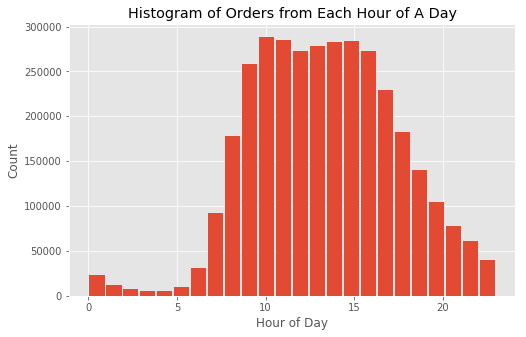

In [37]:
#count, bin_edges = np.histogram(orders['order_hour_of_day'])
orders['order_hour_of_day'].plot(kind='hist',figsize=(8, 5),bins=24, rwidth=0.90) # bins=24 means 24 bins; rwidth adjusts the width of bars to leave spaces between bars

plt.title('Histogram of Orders from Each Hour of A Day') # add a title to the histogram
plt.ylabel('Count') # add y-label
plt.xlabel('Hour of Day') # add x-label

plt.show()

### Insights: There is a clear effect of hour of the day. Most orders were placed between 10AM-4PM.

### Day of Week

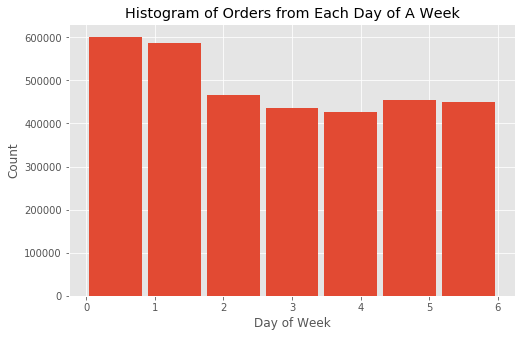

In [38]:
orders['order_dow'].plot(kind='hist',figsize=(8, 5),bins=7, rwidth=0.90) # bins=7 means 7 bins; rwidth adjusts the width of bars to leave spaces between bars

plt.title('Histogram of Orders from Each Day of A Week') # add a title to the histogram
plt.ylabel('Count') # add y-label
plt.xlabel('Day of Week') # add x-label

plt.show()

### Insights: There is a clear effect of day of the week. Most orders were placed on day 0 and 1. We can assume day 0 and 1 are weekend.

## When do they order again?

In [39]:
orders['days_since_prior_order'].max()

30.0

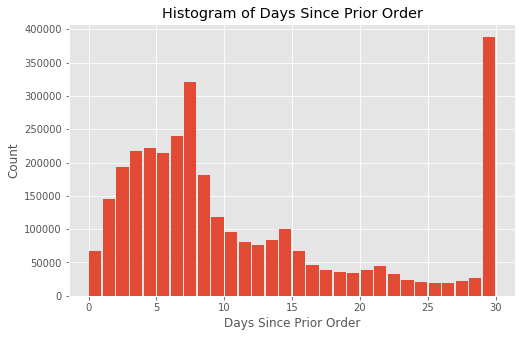

In [40]:
orders['days_since_prior_order'].plot(kind='hist',figsize=(8, 5),bins=30, rwidth=0.90) # bins=30 means 30 bins; rwidth adjusts the width of bars to leave spaces between bars

plt.title('Histogram of Days Since Prior Order') # add a title to the histogram
plt.ylabel('Count') # add y-label
plt.xlabel('Days Since Prior Order') # add x-label

plt.show()

### Insights: People order more often within 1 week of the piro order date. Saw two jump-up on the 7th day and 30th day 

## How many orders do you place each time?

In [41]:
orders['order_number'].max()

100

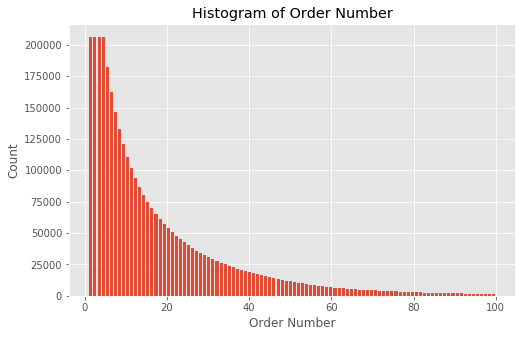

In [42]:
orders['order_number'].plot(kind='hist',figsize=(8, 5),bins=100,rwidth=0.75 ) # bins=100 means 100 bins; rwidth adjusts the width of bars to leave spaces between bars

plt.title('Histogram of Order Number') # add a title to the histogram
plt.ylabel('Count') # add y-label
plt.xlabel('Order Number') # add x-label

plt.show()

### Insights: People tend to place 1-10 orders most of the time they buy

## How many items does each order id buy?

Let’s have a look how many items are in the orders. The distributions are comparable between the train and prior order set.

In [44]:
order_products_prior

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
...,...,...,...,...
32434484,3421083,39678,6,1
32434485,3421083,11352,7,0
32434486,3421083,4600,8,0
32434487,3421083,24852,9,1


In [47]:
# Group by add_to_cart_order for prior set
order_id_cnt = order_products_prior.groupby(['order_id']).apply(lambda g: pd.Series({\
    'Item_number':g.add_to_cart_order.max(),\
}))

In [48]:
order_id_cnt

,Item_number
order_id,
2,9
3,8
4,13
5,26
6,3
...,...
3421079,1
3421080,9
3421081,7


In [50]:
order_id_cnt['Item_number'].max()

145

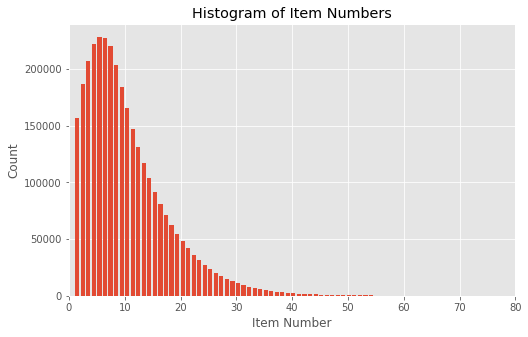

In [56]:
# Plot the histogram of order items for prior set
order_id_cnt['Item_number'].plot(kind='hist',figsize=(8, 5),bins=145, rwidth=0.75 ) # bins=100 means 100 bins; rwidth adjusts the width of bars to leave spaces between bars

plt.xlim(xmin=0, xmax = 80) # xmax limts the x range
plt.title('Histogram of Item Numbers') # add a title to the histogram
plt.ylabel('Count') # add y-label
plt.xlabel('Item Number') # add x-label

plt.show()

In [58]:
# Group by add_to_cart_order for train set
order_id_cnt_tn = order_products_train.groupby(['order_id']).apply(lambda g: pd.Series({\
    'Item_number':g.add_to_cart_order.max(),\
}))

In [61]:
order_id_cnt_tn.max()

Item_number    80
dtype: int64

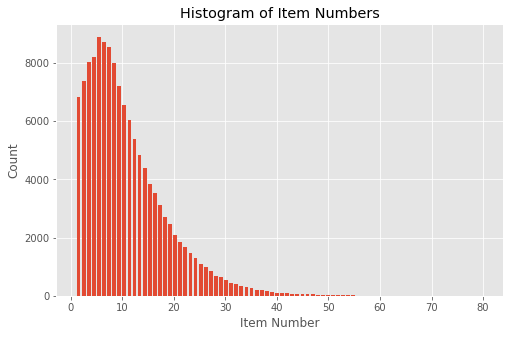

In [62]:
# Plot the histogram of order items for train set
order_id_cnt_tn['Item_number'].plot(kind='hist',figsize=(8, 5),bins=80, rwidth=0.75 ) # bins=100 means 100 bins; rwidth adjusts the width of bars to leave spaces between bars

#plt.xlim(xmin=0, xmax = 80) # xmax limts the x range
plt.title('Histogram of Item Numbers') # add a title to the histogram
plt.ylabel('Count') # add y-label
plt.xlabel('Item Number') # add x-label

plt.show()

## Bestsellers

Let’s have a look which products are sold most often (top10). And the clear winner is: Bananas

In [81]:
# First, concat the records of order_products_prior with order_products_train
orders_products = pd.concat([order_products_prior, order_products_train], ignore_index=True, sort=False)

In [71]:
order_products_prior[order_products_prior['product_id']==33120]

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
237,26,33120,5,0
1084,120,33120,13,0
3039,327,33120,5,1
3709,390,33120,28,1
...,...,...,...,...
32426668,3420280,33120,6,1
32427659,3420373,33120,11,0
32429809,3420587,33120,1,1
32430947,3420711,33120,8,0


In [92]:
# Group by prodcut_id 
product_id_cnt=orders_products.groupby('product_id').apply(lambda g: pd.Series({\
    'Count':g.product_id.count(),\
})).reset_index()

In [93]:
product_id_cnt

,product_id,Count
0,1,1928
1,2,94
2,3,283
3,4,351
4,5,16
...,...,...
49680,49684,9
49681,49685,49
49682,49686,127
49683,49687,14


In [95]:
# Merge product_id_cnt with products
product_cnt = pd.merge(product_id_cnt, products, how='left', on='product_id', validate = '1:1') # validate = '1:1' means check if merge keys are unique in both left and right datasets. if not unique in any side, an error will be returned.

In [98]:
product_cnt

,product_id,Count,product_name,aisle_id,department_id
0,1,1928,Chocolate Sandwich Cookies,61,19
1,2,94,All-Seasons Salt,104,13
2,3,283,Robust Golden Unsweetened Oolong Tea,94,7
3,4,351,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,16,Green Chile Anytime Sauce,5,13
...,...,...,...,...,...
49680,49684,9,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49681,49685,49,En Croute Roast Hazelnut Cranberry,42,1
49682,49686,127,Artisan Baguette,112,3
49683,49687,14,Smartblend Healthy Metabolism Dry Cat Food,41,8


In [107]:
# Return the top 10 products by sales
product_top_10 = product_cnt.sort_values(by='Count', ascending=False)[['product_name','Count']][:10]

In [108]:
# Set product_name as index
product_top_10.set_index('product_name', inplace=True)

In [109]:
product_top_10

,Count
product_name,
Banana,491291
Bag of Organic Bananas,394930
Organic Strawberries,275577
Organic Baby Spinach,251705
Organic Hass Avocado,220877
Organic Avocado,184224
Large Lemon,160792
Strawberries,149445
Limes,146660


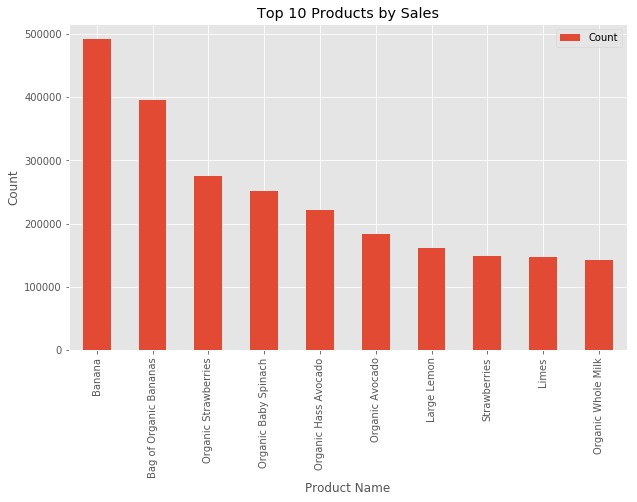

In [106]:
# Draw a bar chart for the top 10 products by sales

product_top_10.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Product Name') # add to x-label to the plot
plt.ylabel('Count') # add y-label to the plot
plt.title('Top 10 Products by Sales') # add title to the plot

plt.show()

## How often do people order the same items again?

Look at train data set

In [113]:
# Count the frequency of reordered 
reorder_cnt_tn = order_products_train.groupby(['reordered']).apply(lambda g: pd.Series({\
                                    'count':g.reordered.count(),\
}))

In [114]:
reorder_cnt_tn

,count
reordered,
0,555793
1,828824


In [130]:
list(reorder_cnt_tn.index)

[0, 1]

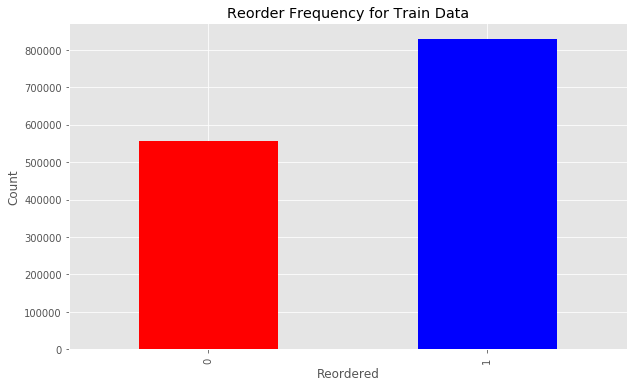

In [139]:
# Draw a bar chart for reorder frequency for train data
from itertools import cycle, islice
from matplotlib.pyplot import *

#my_colors = [plt.cm.Paired(np.arange(len(reorder_cnt_tn)))]
my_colors='rb'# set the color of the first bar chart to red and the second one to blue; r means read and b means blue
reorder_cnt_tn.plot(kind='bar', figsize=(10, 6), color=my_colors, legend=None) # pass my_colors to the color setting
                                                                              # legend=None means hide legend
plt.xlabel('Reordered') # add to x-label to the plot
plt.ylabel('Count') # add y-label to the plot
plt.title('Reorder Frequency for Train Data') # add title to the plot

plt.show()

## What are the most often reordered products?